In [11]:
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

In [12]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0

In [13]:
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)


In [14]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))    # 30%를 제외시키는 규제 적용
model.add(keras.layers.Dense(10,activation='softmax'))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌 때마다 loss, accuracy 값을 저장
history = model.fit(train_scaled,train_target,epochs=20, validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - accuracy: 0.7326 - loss: 0.7598 - val_accuracy: 0.8470 - val_loss: 0.4288
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.8397 - loss: 0.4466 - val_accuracy: 0.8490 - val_loss: 0.4026
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 0.8518 - loss: 0.4044 - val_accuracy: 0.8658 - val_loss: 0.3646
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - accuracy: 0.8616 - loss: 0.3798 - val_accuracy: 0.8603 - val_loss: 0.3746
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step - accuracy: 0.8657 - loss: 0.3624 - val_accuracy: 0.8723 - val_loss: 0.3438
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - accuracy: 0.8697 - loss: 0.3569 - val_accuracy: 0.8719 - val_loss: 0.3422
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 857us/step - accuracy: 0.8721 - loss: 0.3485 - val_accuracy: 0.8771 - val_loss: 0.3403
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step - accuracy: 0.8785 -

Text(0, 0.5, '손실률(loss)')

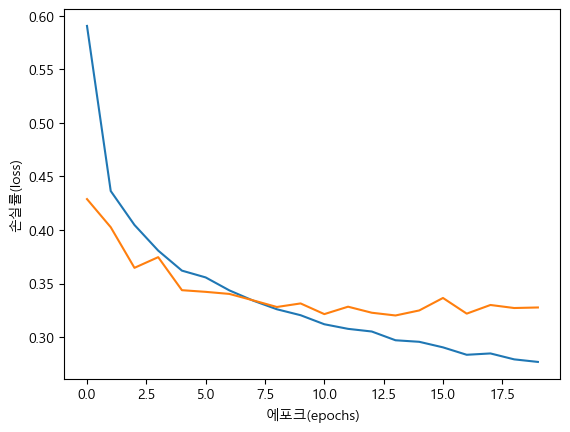

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')

콜백

In [18]:
# 손실률이 가장 낮은 epoch위치의 모델을 저장
# 확장자명 h5 >> keras
# epochs를 20번 돌 때, 가장 좋은 모델을 저장시켜줌.
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
history = model.fit(train_scaled,train_target,epochs=20, validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - accuracy: 0.8988 - loss: 0.2714 - val_accuracy: 0.8869 - val_loss: 0.3256
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.8979 - loss: 0.2708 - val_accuracy: 0.8855 - val_loss: 0.3284
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.8974 - loss: 0.2678 - val_accuracy: 0.8856 - val_loss: 0.3365
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - accuracy: 0.8987 - loss: 0.2635 - val_accuracy: 0.8830 - val_loss: 0.3456
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.9019 - loss: 0.2605 - val_accuracy: 0.8861 - val_loss: 0.3304
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.9016 - loss: 0.2575 - val_accuracy: 0.8866 - val_loss: 0.3296
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step - accuracy: 0.9021 - loss: 0.2574 - val_accuracy: 0.8822 - val_loss: 0.3380
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.9032 -

In [19]:
model = keras.models.load_model('best_model.keras')
model.evaluate(val_scaled,val_target)

ValueError: A total of 1 objects could not be loaded. Example error message for object <keras.src.optimizers.adam.Adam object at 0x000001C6693B3650>:

'Unable to synchronously open object (bad object header version number)'

List of objects that could not be loaded:
[<keras.src.optimizers.adam.Adam object at 0x000001C6693B3650>]

In [ ]:
# 11번째가 가장 좋을 때 20번까지 실행할 필요가 없기에 조기종료 하는 법

# modelCheckpoint : 가장 손실률이 낮은 모델을 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# compile 호출
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 조기종료
# patience=2 : 손실값이 2번이상 증가되면 종료
# restore_best_weights=True : 종료 후 뒤로 back 해서 가장 좋은 모델의 위치로 이동
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)


history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])